In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os
import tensorflow as tf

/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [4]:
METADATA = ["Date:", "Time:", "Measurement mode:", "Excitation wavelength:", 
            "Emission wavelength:", "Excitation bandwidth:", "Emission bandwidth:",
           "Gain (Manual):", "Number of reads:", "FlashMode:", "Integration time:", "Lag time:",
           "Part of the plate:", "Target Temperature:", "Current Temperature:"]

class PipetteTutorial:
    def __init__(self, excelname, save_loc):
        excel = os.path.join(save_loc, excelname)
        self.df = pd.read_excel(excel, sheet_name=0)
        self.metadata = self.parseMetadata()
        self.data = self.parseData()
    def parseMetadata(self):
        df = self.df
        metadata = {}
        def parse(name):
            df2 = df.loc[df[df.columns[0]]==name].dropna(axis=1)
            return df2[df2.columns[1]].iloc[0]
        for item in METADATA:
            metadata[item] = parse(item)
        return metadata
    def parseData(self):
        data = {}
        df = self.df
        start_index = df.loc[df[df.columns[0]]=='<>'].index[0]
        df2 = df.iloc[start_index+1:]
        index = 'A'
        for row in df2.iterrows():
            df_row = list(row[1][1:])
            if "..." not in df_row:
                data[index] = df_row
                index = chr(ord(index) + 1)
        return pd.DataFrame(data)
    def dilutionLine(self, row, save_loc):
        Output = []
        plt.plot(self.data[row])
        plt.title(row)
        Output.append(str(row) + ": " +  str(linregress(self.data['A'], self.data.index)))
        plt.savefig(os.path.join(save_loc, row+"_lineplot.png"))
        plt.show()
        return Output


In [5]:
trial2 = PipetteTutorial("trial_2_data.xlsx", "./")

In [6]:
trial2.data

,A,B,C,D,E,F,G,H
0,3047.0,3238.0,3281.0,3290.0,2.0,1.0,2.0,0.0
1,2144.0,2153.0,2162.0,2215.0,0.0,1.0,1.0,2.0
2,1182.0,1243.0,1.0,0.0,2.0,1.0,2.0,3.0
3,558.0,1254.0,1228.0,0.0,0.0,0.0,1.0,2.0
4,340.0,514.0,625.0,598.0,0.0,0.0,1.0,1.0
5,171.0,324.0,340.0,306.0,178.0,169.0,185.0,1.0
6,2972.0,3268.0,3241.0,3061.0,2151.0,3133.0,3100.0,2928.0
7,1961.0,2064.0,2172.0,1975.0,1994.0,2024.0,1985.0,2113.0
8,1164.0,1166.0,1202.0,1143.0,1119.0,1103.0,1087.0,1058.0
9,381.0,448.0,468.0,483.0,520.0,468.0,520.0,496.0


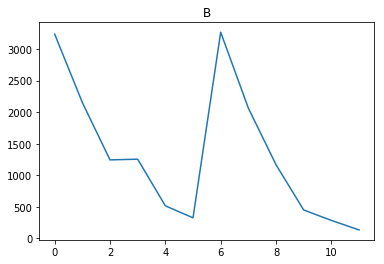

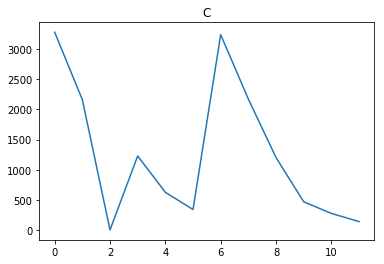

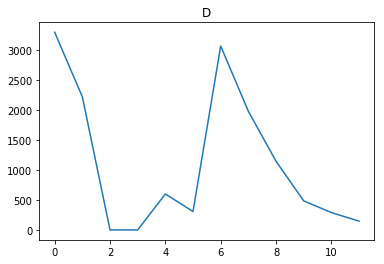

['D: LinregressResult(slope=-0.0017000227147658108, intercept=7.521468676416113, rvalue=-0.5127060544839558, pvalue=0.08829329419943473, stderr=0.0009002415601286036)']

In [7]:
trial2.dilutionLine("B", "./vis") 
trial2.dilutionLine("C", "./vis")
trial2.dilutionLine("D", "./vis")

In [8]:
FEATURES = ["12.5x", "20x", "50x", "125x", "250x", "500x"]

def monteCarloTrainingData(singular_list, numSets=10, dataPts=128):
    allsets = []
    mu = np.mean(singular_list)
    sigma = np.std(singular_list)
    print(mu, sigma)
    for _ in range(numSets):
        gen = np.random.normal(mu, sigma, dataPts)
        allsets.append(gen)
    return allsets

def createTrainingDF(allsets, category):
    trainingDF = pd.DataFrame(columns=FEATURES)
    for index in range(len(allsets)):
        trainingDF[FEATURES[index]] = allsets[index]
    trainingDF["category"] = category
    return trainingDF

In [13]:
createTrainingDF([set1, set2], 1)

,12.5x,20x,50x,125x,250x,500x,category
0,3047.0,2144.0,NaN,NaN,NaN,NaN,1
1,3238.0,2153.0,NaN,NaN,NaN,NaN,1
2,3281.0,2162.0,NaN,NaN,NaN,NaN,1
3,3290.0,2215.0,NaN,NaN,NaN,NaN,1


In [12]:
set1 = list(trial2.data[["A", "B", "C", "D"]].iloc[0])
set2 = list(trial2.data[["A", "B", "C", "D"]].iloc[1])
set3 = list(trial2.data[["A", "B", "C", "D"]].iloc[11])

a1 = monteCarloTrainingData(set1, dataPts=1000)
a2 = monteCarloTrainingData(set2, dataPts=1000)
a3 = monteCarloTrainingData(set3, dataPts=1000)


3214.0 98.39969512147891
2168.5 27.59075932264279
149.5 18.848076824970764


In [14]:
train1= createTrainingDF([a1[0], a2[0], a3[0]], 1)

In [15]:
train2= createTrainingDF([a1[1], a2[1], a3[1]], 0)

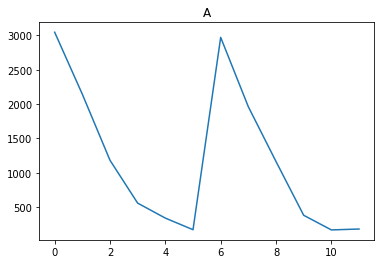

['A: LinregressResult(slope=-0.0017000227147658108, intercept=7.521468676416113, rvalue=-0.5127060544839558, pvalue=0.08829329419943473, stderr=0.0009002415601286036)']


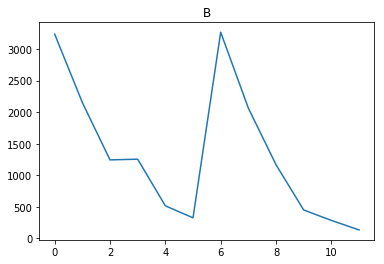

['B: LinregressResult(slope=-0.0017000227147658108, intercept=7.521468676416113, rvalue=-0.5127060544839558, pvalue=0.08829329419943473, stderr=0.0009002415601286036)']


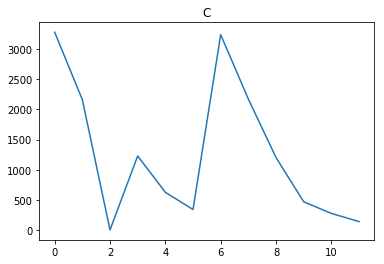

['C: LinregressResult(slope=-0.0017000227147658108, intercept=7.521468676416113, rvalue=-0.5127060544839558, pvalue=0.08829329419943473, stderr=0.0009002415601286036)']


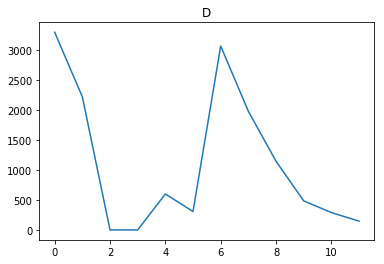

['D: LinregressResult(slope=-0.0017000227147658108, intercept=7.521468676416113, rvalue=-0.5127060544839558, pvalue=0.08829329419943473, stderr=0.0009002415601286036)']


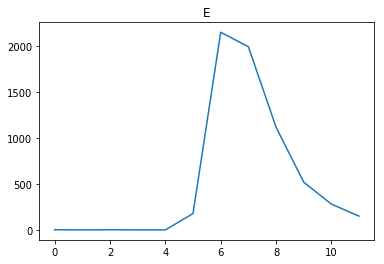

['E: LinregressResult(slope=-0.0017000227147658108, intercept=7.521468676416113, rvalue=-0.5127060544839558, pvalue=0.08829329419943473, stderr=0.0009002415601286036)']


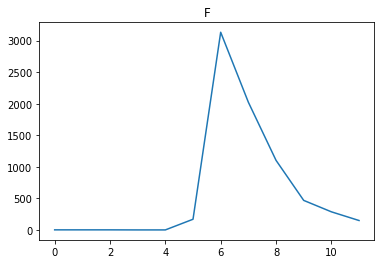

['F: LinregressResult(slope=-0.0017000227147658108, intercept=7.521468676416113, rvalue=-0.5127060544839558, pvalue=0.08829329419943473, stderr=0.0009002415601286036)']


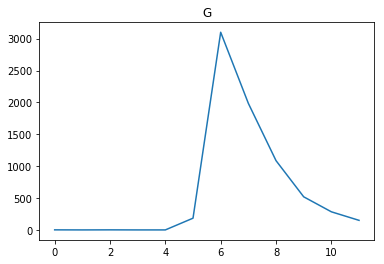

['G: LinregressResult(slope=-0.0017000227147658108, intercept=7.521468676416113, rvalue=-0.5127060544839558, pvalue=0.08829329419943473, stderr=0.0009002415601286036)']


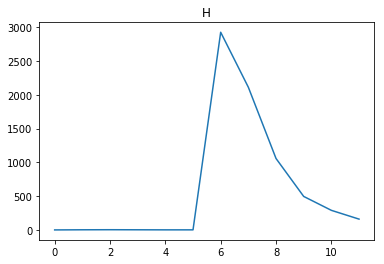

['H: LinregressResult(slope=-0.0017000227147658108, intercept=7.521468676416113, rvalue=-0.5127060544839558, pvalue=0.08829329419943473, stderr=0.0009002415601286036)']


In [16]:
first = ord(trial2.metadata["Part of the plate:"].split(" - ")[0][:1])
last = ord(trial2.metadata["Part of the plate:"].split(" - ")[1][:1])

while first <= last:
    plate = chr(first)
    print(trial2.dilutionLine(plate, "./vis"))
    first += 1

In [20]:
class Model:
    def __init__(self, model_dir):
        self.model = self.build_model(model_dir)
    
    #Build Model
    def build_model(self, model_dir):
        continuous_features = [tf.feature_column.numeric_column(str(k)) for k in FEATURES]
        model = tf.estimator.LinearClassifier(
            n_classes = 2,
            model_dir=model_dir, 
            feature_columns= continuous_features)
        return model
        #Build Model
    def build_model_regu(self, model_dir):
        continuous_features = [tf.feature_column.numeric_column(str(k)) for k in FEATURES]
        model = tf.estimator.LinearClassifier(
            n_classes = 2,
            model_dir=model_dir, 
            feature_columns= continuous_features,
            optimizer=tf.train.FtrlOptimizer(
            learning_rate=0.1,
            l1_regularization_strength=0.9,
            l2_regularization_strength=5))
        return model
    
    #Train Model
    def train_model(self, df_train):
        self.model.train(input_fn=get_input_fn(df_train, 
                                              num_epochs=None,
                                              n_batch = 16,
                                              shuffle=False),
                                              steps=128)

    #Evaluate Model
    def eval_model(self, df_test):
        self.model.evaluate(input_fn=get_input_fn(df_test, 
                                              num_epochs=None,
                                              n_batch = 16,
                                              shuffle=False),
                                              steps=128)
    #Make Prediction with Model
    def makePrediction(self, df):
        outputDF = df.copy()
        pred_iter = self.model.predict(tf.estimator.inputs.pandas_input_fn(df, shuffle=False))
        probabilities = []
        classifier = []
        
        for i in pred_iter:
            probabilities.append(i['probabilities'])
            classifier.append(i['class_ids'])
        outputDF['probabilities'] = probabilities
        outputDF['class_id'] = classifier
        return outputDF
def get_input_fn(data_set, num_epochs=None, n_batch = 16, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(
       x=pd.DataFrame({str(k): data_set[k].values for k in FEATURES}),
       y = pd.Series(data_set['category'].values),
       batch_size=n_batch,   
       num_epochs=num_epochs,
       shuffle=shuffle)

In [21]:
m = Model("./model")
m.train_model(train1)
m.train_model(train2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2ca917b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.

NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key linear/linear_model/12.5x/weights not found in checkpoint
	 [[node save/RestoreV2_1 (defined at <ipython-input-20-bba8edb1d547>:32)  = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]

Caused by op 'save/RestoreV2_1', defined at:
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/asyncio/base_events.py", line 523, in run_forever
    self._run_once()
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/asyncio/base_events.py", line 1758, in _run_once
    handle._run()
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-3afa98ff3898>", line 2, in <module>
    m.train_model(train1)
  File "<ipython-input-20-bba8edb1d547>", line 32, in train_model
    steps=128)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/estimator/estimator.py", line 354, in train
    loss = self._train_model(input_fn, hooks, saving_listeners)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/estimator/estimator.py", line 1207, in _train_model
    return self._train_model_default(input_fn, hooks, saving_listeners)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/estimator/estimator.py", line 1241, in _train_model_default
    saving_listeners)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/estimator/estimator.py", line 1468, in _train_with_estimator_spec
    log_step_count_steps=log_step_count_steps) as mon_sess:
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/monitored_session.py", line 504, in MonitoredTrainingSession
    stop_grace_period_secs=stop_grace_period_secs)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/monitored_session.py", line 921, in __init__
    stop_grace_period_secs=stop_grace_period_secs)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/monitored_session.py", line 643, in __init__
    self._sess = _RecoverableSession(self._coordinated_creator)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/monitored_session.py", line 1107, in __init__
    _WrappedSession.__init__(self, self._create_session())
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/monitored_session.py", line 1112, in _create_session
    return self._sess_creator.create_session()
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/monitored_session.py", line 800, in create_session
    self.tf_sess = self._session_creator.create_session()
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/monitored_session.py", line 557, in create_session
    self._scaffold.finalize()
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/monitored_session.py", line 215, in finalize
    self._saver.build()
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 1114, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 1151, in _build
    build_save=build_save, build_restore=build_restore)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 789, in _build_internal
    restore_sequentially, reshape)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 459, in _AddShardedRestoreOps
    name="restore_shard"))
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 406, in _AddRestoreOps
    restore_sequentially)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/training/saver.py", line 862, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1466, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/Users/nathanwong/Downloads/yes/envs/nathan/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

NotFoundError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key linear/linear_model/12.5x/weights not found in checkpoint
	 [[node save/RestoreV2_1 (defined at <ipython-input-20-bba8edb1d547>:32)  = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]


In [ ]:
m.makePrediction(train2)

In [ ]:
predictDF = pd.DataFrame(columns=FEATURES)
predictDF[]

In [22]:
print(FEATURES)
trial2.data

['12.5x', '20x', '50x', '125x', '250x', '500x']


,A,B,C,D,E,F,G,H
0,3047.0,3238.0,3281.0,3290.0,2.0,1.0,2.0,0.0
1,2144.0,2153.0,2162.0,2215.0,0.0,1.0,1.0,2.0
2,1182.0,1243.0,1.0,0.0,2.0,1.0,2.0,3.0
3,558.0,1254.0,1228.0,0.0,0.0,0.0,1.0,2.0
4,340.0,514.0,625.0,598.0,0.0,0.0,1.0,1.0
5,171.0,324.0,340.0,306.0,178.0,169.0,185.0,1.0
6,2972.0,3268.0,3241.0,3061.0,2151.0,3133.0,3100.0,2928.0
7,1961.0,2064.0,2172.0,1975.0,1994.0,2024.0,1985.0,2113.0
8,1164.0,1166.0,1202.0,1143.0,1119.0,1103.0,1087.0,1058.0
9,381.0,448.0,468.0,483.0,520.0,468.0,520.0,496.0


In [23]:
dilutions = {}
dilutions["12.5x"] = list(trial2.data.iloc[6])
dilutions["20x"] = list(trial2.data.iloc[7])
dilutions["50x"] = list(trial2.data.iloc[8])
dilutions["125x"] = list(trial2.data.iloc[9])
dilutions["250x"] = list(trial2.data.iloc[10])
dilutions["500x"] = list(trial2.data.iloc[11])

In [24]:
dilutions

{'12.5x': [2972.0, 3268.0, 3241.0, 3061.0, 2151.0, 3133.0, 3100.0, 2928.0],
 '20x': [1961.0, 2064.0, 2172.0, 1975.0, 1994.0, 2024.0, 1985.0, 2113.0],
 '50x': [1164.0, 1166.0, 1202.0, 1143.0, 1119.0, 1103.0, 1087.0, 1058.0],
 '125x': [381.0, 448.0, 468.0, 483.0, 520.0, 468.0, 520.0, 496.0],
 '250x': [168.0, 283.0, 275.0, 289.0, 281.0, 287.0, 285.0, 290.0],
 '500x': [181.0, 132.0, 139.0, 146.0, 150.0, 149.0, 151.0, 160.0]}

In [25]:
fake_dilutions = [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
f_dilutions = {}
for key in dilutions.keys():
    f_dilutions[key] = list(fake_dilutions)
f_dilutions

{'12.5x': [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
 '20x': [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
 '50x': [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
 '125x': [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
 '250x': [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0],
 '500x': [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]}

In [26]:
def generateDF(dilutions_dict, category):
    allDat = {}
    for key in dilutions_dict.keys():
        allDat[key] = monteCarloTrainingData(dilutions_dict[key])
    trainingDF = []
    for index in range(10):
        trainingDF.append(createTrainingDF([allDat[key][index] for key in allDat.keys()], category))
    return trainingDF

In [27]:
cat_1_df = generateDF(dilutions, 1)

2981.75 332.68218692920726
2036.0 69.87846592477543
1130.25 44.28247395979588
473.0 42.10997506529777
269.75 38.71934271136327
151.0 13.765899897936205


In [28]:
cat_2_df = generateDF(f_dilutions, 0)

100.0 0.0
100.0 0.0
100.0 0.0
100.0 0.0
100.0 0.0
100.0 0.0


In [29]:
cat_2_df[0]

,12.5x,20x,50x,125x,250x,500x,category
0,100.0,100.0,100.0,100.0,100.0,100.0,0
1,100.0,100.0,100.0,100.0,100.0,100.0,0
2,100.0,100.0,100.0,100.0,100.0,100.0,0
3,100.0,100.0,100.0,100.0,100.0,100.0,0
4,100.0,100.0,100.0,100.0,100.0,100.0,0
5,100.0,100.0,100.0,100.0,100.0,100.0,0
6,100.0,100.0,100.0,100.0,100.0,100.0,0
7,100.0,100.0,100.0,100.0,100.0,100.0,0
8,100.0,100.0,100.0,100.0,100.0,100.0,0
9,100.0,100.0,100.0,100.0,100.0,100.0,0


In [30]:
cat_1_df[0]

,12.5x,20x,50x,125x,250x,500x,category
0,2452.478546,2112.723504,1180.545120,510.758579,255.616283,139.443873,1
1,3259.112120,2039.838164,1091.478254,456.488260,291.499432,157.498161,1
2,3116.688526,1943.925023,1165.519616,561.400918,261.007483,170.356440,1
3,2870.778981,1975.775267,1053.120767,508.864069,190.744834,135.085366,1
4,2885.898478,2095.449770,1112.992356,478.862480,241.513583,152.353100,1
5,2044.444920,1863.196239,1111.264158,508.247779,330.219873,115.391216,1
6,3660.411251,2024.433753,1093.398150,436.396044,320.896619,164.709417,1
7,2574.184289,2002.098547,1212.295268,485.066856,326.309884,164.707856,1
8,2773.342761,2111.359409,1117.470043,492.060959,229.280855,164.393139,1
9,2886.438068,2043.754455,1166.335119,504.178958,236.827272,129.151926,1


In [31]:
std_model = Model("./model2")
std_model.train_model(cat_1_df[0])
std_model.train_model(cat_2_df[0])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2d151e48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalize

In [32]:
std_model.makePrediction(cat_1_df[1])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model2/model.ckpt-1408
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


,12.5x,20x,50x,125x,250x,500x,category,probabilities,class_id
0,2818.008608,2043.820724,1163.331762,452.648387,319.514675,155.021324,1,"[0.0, 1.0]",[1]
1,2988.203580,2000.320439,1237.961731,438.673383,327.897006,156.599380,1,"[0.0, 1.0]",[1]
2,3689.020090,1988.257120,1131.553996,487.328467,188.765568,154.868191,1,"[0.0, 1.0]",[1]
3,3217.628085,2079.933733,1062.441549,432.698332,215.261495,146.191785,1,"[0.0, 1.0]",[1]
4,3530.111493,2113.877583,1083.149479,497.574803,253.618522,144.955268,1,"[0.0, 1.0]",[1]
5,2839.597586,2127.488873,1126.805085,491.268973,251.619692,146.427255,1,"[0.0, 1.0]",[1]
6,2407.988712,1942.600903,1133.194538,472.189187,285.952873,164.486158,1,"[0.0, 1.0]",[1]
7,2930.853324,1958.618289,1078.694877,467.516436,264.610112,146.785465,1,"[0.0, 1.0]",[1]
8,2719.557452,2031.527723,1032.373567,534.125396,234.249665,159.446962,1,"[0.0, 1.0]",[1]
9,3703.732285,2128.078647,1149.265881,492.664103,330.811787,141.957528,1,"[0.0, 1.0]",[1]


In [33]:
std_model.makePrediction(cat_2_df[1])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model2/model.ckpt-1408
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


,12.5x,20x,50x,125x,250x,500x,category,probabilities,class_id
0,100.0,100.0,100.0,100.0,100.0,100.0,0,"[1.0, 1.00779954e-10]",[0]
1,100.0,100.0,100.0,100.0,100.0,100.0,0,"[1.0, 1.00779954e-10]",[0]
2,100.0,100.0,100.0,100.0,100.0,100.0,0,"[1.0, 1.00779954e-10]",[0]
3,100.0,100.0,100.0,100.0,100.0,100.0,0,"[1.0, 1.00779954e-10]",[0]
4,100.0,100.0,100.0,100.0,100.0,100.0,0,"[1.0, 1.00779954e-10]",[0]
5,100.0,100.0,100.0,100.0,100.0,100.0,0,"[1.0, 1.00779954e-10]",[0]
6,100.0,100.0,100.0,100.0,100.0,100.0,0,"[1.0, 1.00779954e-10]",[0]
7,100.0,100.0,100.0,100.0,100.0,100.0,0,"[1.0, 1.00779954e-10]",[0]
8,100.0,100.0,100.0,100.0,100.0,100.0,0,"[1.0, 1.00779954e-10]",[0]
9,100.0,100.0,100.0,100.0,100.0,100.0,0,"[1.0, 1.00779954e-10]",[0]


In [34]:
std_model.makePrediction(pd.DataFrame(dilutions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model2/model.ckpt-1408
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


,12.5x,20x,50x,125x,250x,500x,probabilities,class_id
0,2972.0,1961.0,1164.0,381.0,168.0,181.0,"[0.0, 1.0]",[1]
1,3268.0,2064.0,1166.0,448.0,283.0,132.0,"[0.0, 1.0]",[1]
2,3241.0,2172.0,1202.0,468.0,275.0,139.0,"[0.0, 1.0]",[1]
3,3061.0,1975.0,1143.0,483.0,289.0,146.0,"[0.0, 1.0]",[1]
4,2151.0,1994.0,1119.0,520.0,281.0,150.0,"[0.0, 1.0]",[1]
5,3133.0,2024.0,1103.0,468.0,287.0,149.0,"[0.0, 1.0]",[1]
6,3100.0,1985.0,1087.0,520.0,285.0,151.0,"[0.0, 1.0]",[1]
7,2928.0,2113.0,1058.0,496.0,290.0,160.0,"[0.0, 1.0]",[1]


In [35]:
def performTest(df):
    test_data = pd.DataFrame(columns=FEATURES)
    raw_test_data = list(df["A"].iloc[:6])
    index = 0
    for col in test_data.columns:
        test_data[col] = [raw_test_data[index]]
        index += 1
    return test_data

In [38]:
test_data

{'12.5x': [3047.0],
 '20x': [2144.0],
 '50x': [1182.0],
 '125x': [558.0],
 '250x': [340.0],
 '500x': [171.0]}

In [39]:
test_data = {}
index = 0
for val in trial2.data["A"].iloc[:6]:
    test_data[FEATURES[index]] = [val]
    index += 1

In [40]:
test_data

{'12.5x': [3047.0],
 '20x': [2144.0],
 '50x': [1182.0],
 '125x': [558.0],
 '250x': [340.0],
 '500x': [171.0]}

In [41]:
std_model.makePrediction(pd.DataFrame(test_data))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model2/model.ckpt-1408
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


,12.5x,20x,50x,125x,250x,500x,probabilities,class_id
0,3047.0,2144.0,1182.0,558.0,340.0,171.0,"[0.0, 1.0]",[1]
